In [1]:
from OFDM import *
%matplotlib inline

In [2]:
known_seq_dec = np.genfromtxt("handouts/week_2_challenge/a7r56tu_knownseq.csv", delimiter=r"\s+")

known_seq = np.array([])

for b in known_seq_dec:
    x = format(int(b),'02b')
    for i in x:
        known_seq = np.append(known_seq, int(i))

In [3]:
rx = receiver(ofdm_symbol_size= 4096, cp_length=0, modulation="QPSK",pilot_sequence=known_seq, end_chirp=False)

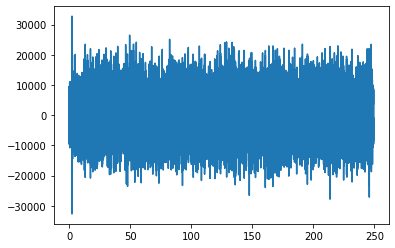

In [6]:
fs, signal = wavfile.read("handouts/week_2_challenge/a7r56tu_received.wav")
rx.fs = fs

time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time,signal)

In [5]:
rx_bits = rx.receive(signal)

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               0 
Modulation method:                  QPSK


ValueError: cannot reshape array of size 11855366 into shape (4096)